4.331797235023042e-13


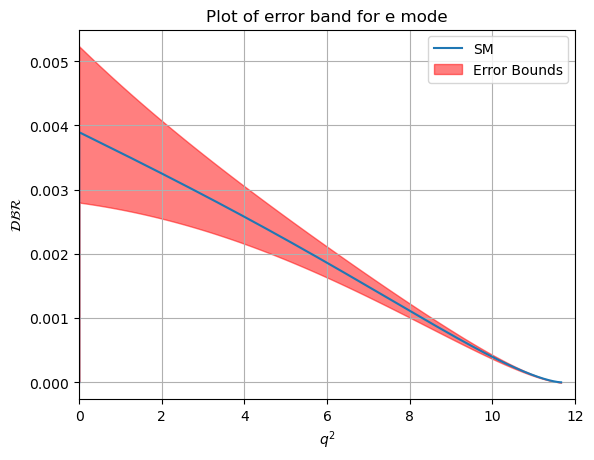

In [2]:
#for tau mode (upper error)
import numpy as np
from sympy import Symbol, integrate, sqrt, cos
import matplotlib.pyplot as plt
# Constants
#w = 1.59
G_F = 1.1663787*10**(-5)
V_cb = 40.9*10**(-3)
tau_b_0 = 1.519*10**(-12)

# Masses in GeV/c^2
m_D = 1.86486
m_B = 5.27955
m_b = 4.18
m_c = 1.275
m_e = 0.000511
#m_tau = 1.77686
r = m_D/m_B
# Values of a-0_i's
a_0_0 = 0.01140
a_0_1 = -0.0590
a_0_2 = 0.19
a_0_3 = -0.03

# Values of a_1_i's
a_1_0 = 0.01261
a_1_1 = -0.0963
a_1_2 = 0.37
a_1_3 = -0.05

# Values of phi's
phi_0 = 0.5299
phi_1 = 1.1213

#setting values of C's
C_V_LL = 0
C_V_RL = 0
C_S_RL = 0
C_S_LL = 0
C_T_LL = 0
C_V_LR = 0
C_V_RR = 0
C_S_RR = 0
C_S_LR = 0
C_T_RR = 0

#print(C_S_LR)


#error values
error_V_cb = 1.1e-3

error_a_0_0 = 0.00009
error_a_0_1 = 0.0028
error_a_0_2 = 0.10
error_a_0_3 = 0.87
error_a_1_0 = 0.00010
error_a_1_1 = 0.0033
error_a_1_2 = 0.11
error_a_1_3 = 0.90


#defining error range
V_cb_upper = V_cb + error_V_cb
V_cb_lower = V_cb - error_V_cb

a_0_0_upper = a_0_0 + error_a_0_0
a_0_0_lower = a_0_0 - error_a_0_0

a_0_1_upper = a_0_1 + error_a_0_1
a_0_1_lower = a_0_1 - error_a_0_1

a_0_2_upper = a_0_2 + error_a_0_2
a_0_2_lower = a_0_2 - error_a_0_2

a_0_3_upper = a_0_3 + error_a_0_3
a_0_3_lower = a_0_3 - error_a_0_3

a_1_0_upper = a_1_0 + error_a_1_0
a_1_0_lower = a_1_0 - error_a_1_0

a_1_1_upper = a_1_1 + error_a_1_1
a_1_1_lower = a_1_1 - error_a_1_1

a_1_2_upper = a_1_2 + error_a_1_2
a_1_2_lower = a_1_2 - error_a_1_2

a_1_3_upper = a_1_3 + error_a_1_3
a_1_3_lower = a_1_3 - error_a_1_3


# Spacing and defining range
q_2 = np.linspace(m_e**2, (m_B - m_D)**2, 10000)
#q_0 = np.sqrt(q_2)


def D_gamma(q_2):
  z = (np.sqrt((m_B+m_D)**2-q_2) - np.sqrt(4*m_B*m_D)) / (np.sqrt((m_B+m_D)**2-q_2) + np.sqrt(4*m_B*m_D))

  #phi's
  Phi_0 = phi_0 * (1+z) * (1-z)**(3/2)/((1+r)*(1-z)+2*np.sqrt(r)*(1+z))**(4)
  Phi_1 = phi_1 * (1+z)**2 * (1-z)**(1/2)/((1+r)*(1-z)+2*np.sqrt(r)*(1+z))**(5)

  #f's
  f_0 = (a_0_0 + a_0_1 * z + a_0_2 * z**2 + a_0_3 * z**3)/(Phi_0)
  f_1 = (a_1_0 + a_1_1 * z + a_1_2 * z**2 + a_1_3 * z**3)/(Phi_1)

  #lamda
  lamda_D = m_B**4 + m_D**4 + q_2**2 - 2 * m_B**2 * m_D**2 - 2 * m_D**2 * q_2 - 2 * m_B**2 * q_2

  #h's factor
  H_s_V0 = np.sqrt(lamda_D/q_2) * f_1
  H_s_Vt = ((m_B**2-m_D**2)/np.sqrt(q_2)) * f_0

  #for time being in B to D
  H_s_T = 0
  H_s_S = 0

  #A's factor
  A_L_0 = (1 + C_V_LL + C_V_RL) * H_s_V0
  A_L_T = 2 * (C_T_LL) * H_s_T
  A_L_t = (1 + C_V_LL + C_V_RL) * H_s_Vt
  A_L_S = (C_S_RL + C_S_LL) * H_s_S
  A_R_0 = (C_V_LR + C_V_RR) * H_s_V0
  A_R_t = (C_V_LR + C_V_RR) * H_s_Vt
  A_R_S = (C_S_RR + C_S_LR) * H_s_S
  A_R_T = 2 * C_T_RR * H_s_T

  #J's
#  J_2_L = -(1-(m_tau**2/np.sqrt(q_2))) * (abs(((A_L_0))**2) - 4 * abs((A_L_T)**2))
#  J_2_R = -(1-(m_tau**2/np.sqrt(q_2))) * (abs((A_R_0)**2) - 4 * abs((A_R_T)**2))
#  J_2 = J_2_L + J_2_R #final

#  J_0_L = abs((A_L_0 - (2*m_tau/np.sqrt(q_2))*A_L_T)**2) + (m_tau**2/q_2) * abs((A_L_t + (np.sqrt(q_2)/m_tau) * A_L_S)**2)
#  J_0_R = abs((A_R_0 - (2*m_tau/np.sqrt(q_2))*A_R_T)**2) + (m_tau**2/q_2) * abs((A_R_t + (np.sqrt(q_2)/m_tau) * A_R_S)**2)
#  J_0 = J_0_L + J_0_R  # the 2nd final

  #J's
  J_2_L = -(1-(m_e**2/(q_2))) * ((abs(A_L_0))**2 - 4 * (abs(A_L_T))**2)  #new
  J_2_R = -(1-(m_e**2/(q_2))) * ((abs(A_R_0))**2 - 4 * (abs(A_R_T))**2)  #new
#  J_2_R = -(1-(m_e**2/np.sqrt(q_2))) * (abs((A_R_0)**2) - 4 * abs((A_R_T)**2))
  J_2 = J_2_L + J_2_R #final

  J_0_L = (abs(A_L_0-(2*m_e/np.sqrt(q_2))*A_L_T))**2 + (m_e**2/q_2) * (abs(A_L_t  + (np.sqrt(q_2)/m_e) * A_L_S))**2  #new
  J_0_R = (abs(A_R_0-(2*m_e/np.sqrt(q_2))*A_R_T))**2 + (m_e**2/q_2) * (abs(A_R_t  + (np.sqrt(q_2)/m_e) * A_R_S))**2  #new
#  J_0_L = abs((A_L_0 - (2*m_e/np.sqrt(q_2))*A_L_T)**2) + (m_e**2/q_2) * abs((A_L_t + (np.sqrt(q_2)/m_e) * A_L_S)**2)
#  J_0_R = abs((A_R_0 - (2*m_e/np.sqrt(q_2))*A_R_T)**2) + (m_e**2/q_2) * abs((A_R_t + (np.sqrt(q_2)/m_e) * A_R_S)**2)
  J_0 = J_0_L + J_0_R  # the 2nd final

  # factor in front
  alpha = ((G_F**2 * V_cb**2)/(256*m_B**3*np.pi**3)) * q_2 * np.sqrt(lamda_D) * (1-(m_e**2/q_2))**2

  D_gamma = alpha * (2 * J_0 + (2/3) * J_2)
  return (D_gamma)


def D_gamma_upper(q_2):    #higher error
  z = (np.sqrt((m_B+m_D)**2-q_2) - np.sqrt(4*m_B*m_D)) / (np.sqrt((m_B+m_D)**2-q_2) + np.sqrt(4*m_B*m_D))

  #phi's
  Phi_0 = phi_0 * (1+z) * (1-z)**(3/2)/((1+r)*(1-z)+2*np.sqrt(r)*(1+z))**(4)
  Phi_1 = phi_1 * (1+z)**2 * (1-z)**(1/2)/((1+r)*(1-z)+2*np.sqrt(r)*(1+z))**(5)

  #f's
  f_0_u = (a_0_0_upper + a_0_1_upper * z + a_0_2_upper * z**2 + a_0_3_upper * z**3)/(Phi_0)
  f_1_u = (a_1_0_upper + a_1_1_upper* z + a_1_2_upper * z**2 + a_1_3_upper * z**3)/(Phi_1)

  #lamda
  lamda_D = m_B**4 + m_D**4 + q_2**2 - 2 * m_B**2 * m_D**2 - 2 * m_D**2 * q_2 - 2 * m_B**2 * q_2

  #h's factor
  H_s_V0_u = np.sqrt(lamda_D/q_2) * f_1_u
  H_s_Vt_u = ((m_B**2-m_D**2)/np.sqrt(q_2)) * f_0_u

  #for time being in B to D
  H_s_T = 0
  H_s_S = 0

  #A's factor
  A_L_0_u = (1 + C_V_LL + C_V_RL) * H_s_V0_u
  A_L_T = 2 * (C_T_LL) * H_s_T
  A_L_t_u = (1 + C_V_LL + C_V_RL) * H_s_Vt_u
  A_L_S = (C_S_RL + C_S_LL) * H_s_S
  A_R_0_u = (C_V_LR + C_V_RR) * H_s_V0_u
  A_R_t_u = (C_V_LR + C_V_RR) * H_s_Vt_u
  A_R_S = (C_S_RR + C_S_LR) * H_s_S
  A_R_T = 2 * C_T_RR * H_s_T

  #J's
#  J_2_L = -(1-(m_tau**2/np.sqrt(q_2))) * (abs(((A_L_0))**2) - 4 * abs((A_L_T)**2))
#  J_2_R = -(1-(m_tau**2/np.sqrt(q_2))) * (abs((A_R_0)**2) - 4 * abs((A_R_T)**2))
#  J_2 = J_2_L + J_2_R #final

#  J_0_L = abs((A_L_0 - (2*m_tau/np.sqrt(q_2))*A_L_T)**2) + (m_tau**2/q_2) * abs((A_L_t + (np.sqrt(q_2)/m_tau) * A_L_S)**2)
#  J_0_R = abs((A_R_0 - (2*m_tau/np.sqrt(q_2))*A_R_T)**2) + (m_tau**2/q_2) * abs((A_R_t + (np.sqrt(q_2)/m_tau) * A_R_S)**2)
#  J_0 = J_0_L + J_0_R  # the 2nd final

  #J's
  J_2_L_u = -(1-(m_e**2/(q_2))) * ((abs(A_L_0_u))**2 - 4 * (abs(A_L_T))**2)  #new
  J_2_R_u = -(1-(m_e**2/(q_2))) * ((abs(A_R_0_u))**2 - 4 * (abs(A_R_T))**2)  #new
#  J_2_R = -(1-(m_e**2/np.sqrt(q_2))) * (abs((A_R_0)**2) - 4 * abs((A_R_T)**2))
  J_2_u = J_2_L_u + J_2_R_u #final

  J_0_L_u = (abs(A_L_0_u-(2*m_e/np.sqrt(q_2))*A_L_T))**2 + (m_e**2/q_2) * (abs(A_L_t_u  + (np.sqrt(q_2)/m_e) * A_L_S))**2  #new
  J_0_R_u = (abs(A_R_0_u-(2*m_e/np.sqrt(q_2))*A_R_T))**2 + (m_e**2/q_2) * (abs(A_R_t_u  + (np.sqrt(q_2)/m_e) * A_R_S))**2  #new
#  J_0_L = abs((A_L_0 - (2*m_e/np.sqrt(q_2))*A_L_T)**2) + (m_e**2/q_2) * abs((A_L_t + (np.sqrt(q_2)/m_e) * A_L_S)**2)
#  J_0_R = abs((A_R_0 - (2*m_e/np.sqrt(q_2))*A_R_T)**2) + (m_e**2/q_2) * abs((A_R_t + (np.sqrt(q_2)/m_e) * A_R_S)**2)
  J_0_u = J_0_L_u + J_0_R_u  # the 2nd final



  # factor in front
  alpha_u = ((G_F**2 * V_cb_upper**2)/(256*m_B**3*np.pi**3)) * q_2 * np.sqrt(lamda_D) * (1-(m_e**2/q_2))**2

  D_gamma_upper = alpha_u * (2 * J_0_u + (2/3) * J_2_u)
  return (D_gamma_upper)

def D_gamma_lower(q_2):                     # lower error
  z = (np.sqrt((m_B+m_D)**2-q_2) - np.sqrt(4*m_B*m_D)) / (np.sqrt((m_B+m_D)**2-q_2) + np.sqrt(4*m_B*m_D))

  #phi's
  Phi_0 = phi_0 * (1+z) * (1-z)**(3/2)/((1+r)*(1-z)+2*np.sqrt(r)*(1+z))**(4)
  Phi_1 = phi_1 * (1+z)**2 * (1-z)**(1/2)/((1+r)*(1-z)+2*np.sqrt(r)*(1+z))**(5)

  #f's
  f_0_l = (a_0_0_lower + a_0_1_lower * z + a_0_2_lower * z**2 + a_0_3_lower * z**3)/(Phi_0)
  f_1_l = (a_1_0_lower + a_1_1_lower* z + a_1_2_lower * z**2 + a_1_3_lower * z**3)/(Phi_1)

  #lamda
  lamda_D = m_B**4 + m_D**4 + q_2**2 - 2 * m_B**2 * m_D**2 - 2 * m_D**2 * q_2 - 2 * m_B**2 * q_2

  #h's factor
  H_s_V0_l = np.sqrt(lamda_D/q_2) * f_1_l
  H_s_Vt_l = ((m_B**2-m_D**2)/np.sqrt(q_2)) * f_0_l

  #for time being in B to D
  H_s_T = 0
  H_s_S = 0

  #A's factor
  A_L_0_l = (1 + C_V_LL + C_V_RL) * H_s_V0_l
  A_L_T = 2 * (C_T_LL) * H_s_T
  A_L_t_l = (1 + C_V_LL + C_V_RL) * H_s_Vt_l
  A_L_S = (C_S_RL + C_S_LL) * H_s_S
  A_R_0_l = (C_V_LR + C_V_RR) * H_s_V0_l
  A_R_t_l = (C_V_LR + C_V_RR) * H_s_Vt_l
  A_R_S = (C_S_RR + C_S_LR) * H_s_S
  A_R_T = 2 * C_T_RR * H_s_T

  #J's
#  J_2_L = -(1-(m_tau**2/np.sqrt(q_2))) * (abs(((A_L_0))**2) - 4 * abs((A_L_T)**2))
#  J_2_R = -(1-(m_tau**2/np.sqrt(q_2))) * (abs((A_R_0)**2) - 4 * abs((A_R_T)**2))
#  J_2 = J_2_L + J_2_R #final

#  J_0_L = abs((A_L_0 - (2*m_tau/np.sqrt(q_2))*A_L_T)**2) + (m_tau**2/q_2) * abs((A_L_t + (np.sqrt(q_2)/m_tau) * A_L_S)**2)
#  J_0_R = abs((A_R_0 - (2*m_tau/np.sqrt(q_2))*A_R_T)**2) + (m_tau**2/q_2) * abs((A_R_t + (np.sqrt(q_2)/m_tau) * A_R_S)**2)
#  J_0 = J_0_L + J_0_R  # the 2nd final

  #J's
  J_2_L_l = -(1-(m_e**2/(q_2))) * ((abs(A_L_0_l))**2 - 4 * (abs(A_L_T))**2)  #new
  J_2_R_l = -(1-(m_e**2/(q_2))) * ((abs(A_R_0_l))**2 - 4 * (abs(A_R_T))**2)  #new
#  J_2_R = -(1-(m_e**2/np.sqrt(q_2))) * (abs((A_R_0)**2) - 4 * abs((A_R_T)**2))
  J_2_l = J_2_L_l + J_2_R_l #final

  J_0_L_l = (abs(A_L_0_l-(2*m_e/np.sqrt(q_2))*A_L_T))**2 + (m_e**2/q_2) * (abs(A_L_t_l  + (np.sqrt(q_2)/m_e) * A_L_S))**2  #new
  J_0_R_l = (abs(A_R_0_l-(2*m_e/np.sqrt(q_2))*A_R_T))**2 + (m_e**2/q_2) * (abs(A_R_t_l  + (np.sqrt(q_2)/m_e) * A_R_S))**2  #new
#  J_0_L = abs((A_L_0 - (2*m_e/np.sqrt(q_2))*A_L_T)**2) + (m_e**2/q_2) * abs((A_L_t + (np.sqrt(q_2)/m_e) * A_L_S)**2)
#  J_0_R = abs((A_R_0 - (2*m_e/np.sqrt(q_2))*A_R_T)**2) + (m_e**2/q_2) * abs((A_R_t + (np.sqrt(q_2)/m_e) * A_R_S)**2)
  J_0_l = J_0_L_l + J_0_R_l  # the 2nd final
  # factor in front
  alpha_l = ((G_F**2 * V_cb_lower**2)/(256*m_B**3*np.pi**3)) * q_2 * np.sqrt(lamda_D) * (1-(m_e**2/q_2))**2

  D_gamma_lower = alpha_l * (2 * J_0_l + (2/3) * J_2_l)
  return (D_gamma_lower)

tau_total = 6.58*10**(-25)/tau_b_0
print(tau_total)
y = D_gamma(q_2)/ tau_total
# Calculate corresponding y values with upper and lower bounds of errors
y_upper = D_gamma_upper(q_2) / tau_total
y_lower = D_gamma_lower(q_2) / tau_total


# Create the plot with shaded error region
plt.plot(q_2, y , label='SM')
plt.fill_between(q_2, y_lower, y_upper, color='red', alpha=0.5, label='Error Bounds')
plt.xlabel('$q^2$')
plt.ylabel('$\mathcal{DBR}$')
plt.title('Plot of error band for e mode')
plt.legend()
plt.xlim(0,12)
plt.grid(True)

# Show the plot
plt.show()